--- Original DataFrame Head ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wine

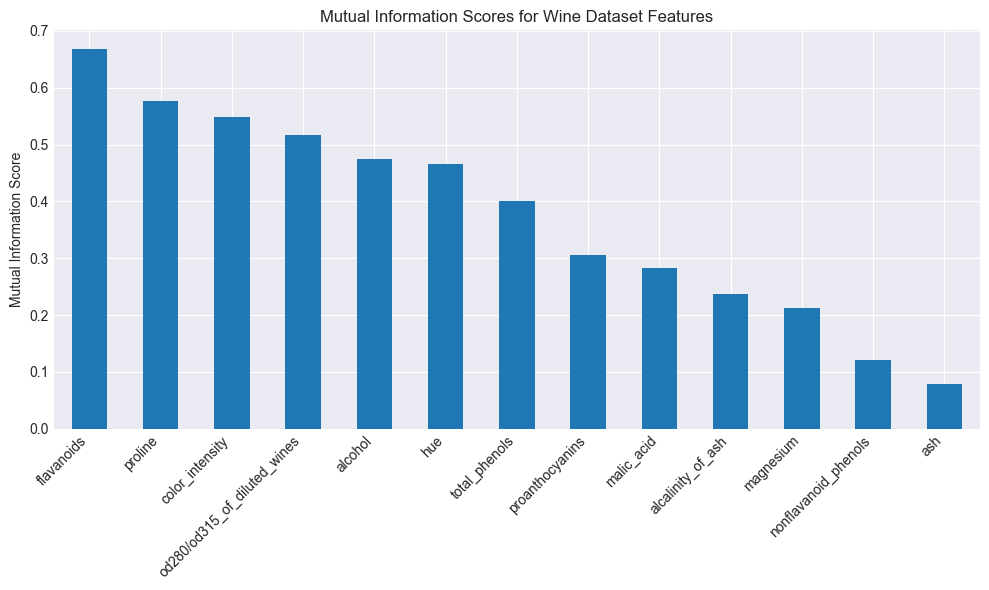


--- DataFrame with Top 5 Selected Features ---
   flavanoids  proline  color_intensity  od280/od315_of_diluted_wines  \
0        3.06   1065.0             5.64                          3.92   
1        2.76   1050.0             4.38                          3.40   
2        3.24   1185.0             5.68                          3.17   
3        3.49   1480.0             7.80                          3.45   
4        2.69    735.0             4.32                          2.93   

   alcohol  target  
0    14.23       0  
1    13.20       0  
2    13.16       0  
3    14.37       0  
4    13.24       0  

--- New DataFrame Shape ---
Features: 5, Rows: 178


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# --- When to Use Mutual Information for Feature Selection ---
# Mutual Information (MI) is a filter-bA2Aased feature selection method.
# It measures the dependency between two variables, capturing both linear and non-linear relationships.
#
# Use it when:
# 1. You have a supervised learning problem (with a target variable).
# 2. You want to understand which features are most "informative" about the target.
# 3. You suspect that the relationship between features and the target might be non-linear.
# 4. You need a fast, univariate method to rank features before feeding them into a more complex model.
#
# Data Requirements:
# - It works with both continuous and discrete features.
# - For scikit-learn's implementation, the target variable should be discrete (i.e., for classification problems).
# - The features are typically numerical, but can be discrete as well.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# The Wine dataset is a classic multi-class classification dataset.
# It has 13 numerical features and a target variable with 3 classes (different types of wine).
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# For demonstration, let's combine them into a single DataFrame
df = pd.concat([X, y], axis=1)
print("--- Original DataFrame Head ---")
print(df.head())
print("\n--- Original DataFrame Shape ---")
print(f"Features: {X.shape[1]}, Rows: {X.shape[0]}")


# 2. APPLY THE MUTUAL INFORMATION TECHNIQUE
# We will calculate the Mutual Information between each feature in X and the target variable y.
# This will give us a score for each feature, indicating how much information it provides about the target.
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a pandas Series for better visualization
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)


# 3. SHOW THE RESULT OF APPLYING THE TECHNIQUE
# We'll visualize the scores in a bar chart to easily compare the features.
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
mi_scores.plot(kind='bar', ax=ax)
ax.set_title("Mutual Information Scores for Wine Dataset Features")
ax.set_ylabel("Mutual Information Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
print("\n--- Mutual Information Scores ---")
print(mi_scores)
print("\nDisplaying bar chart of Mutual Information scores...")
plt.show()


# 4. SELECT FEATURES AND CREATE A NEW DATAFRAME
# Based on the MI scores, we can select the top N features.
# Looking at the chart, features like 'flavanoids', 'color_intensity', and 'proline' are highly informative.
# Let's select the top 5 features.
top_n_features = 5
selected_features = mi_scores.head(top_n_features).index.tolist()

# Create a new DataFrame containing only the selected features and the target.
df_selected = df[selected_features + ['target']]


# 5. PRINT THE HEAD OF THE RESULTING DATAFRAME
print(f"\n--- DataFrame with Top {top_n_features} Selected Features ---")
print(df_selected.head())
print("\n--- New DataFrame Shape ---")
print(f"Features: {df_selected.shape[1]-1}, Rows: {df_selected.shape[0]}")
